# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Car Crash Rates - Car crash rates are increasingly on the rise so what are the major reasons for the number of crashes?

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

What are the major factors that are causing an increase in car crashes?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
My hypothesis is that texting and substance abuse are the leading causes of increased crashes.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

https://www.kaggle.com/datasets/joebeachcapital/car-crashes

https://crashviewer.nhtsa.dot.gov/CrashAPI  (There are several API calls that I will be utilizing here)

http://data.ctdata.org/dataset/motor-vehicle-accidents

I will be relating these data sets to identify commonalities amongst them to ensure accurate results.





## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

This demonstrates the call, but I will be using the data to identify common trends as to what causes the most accidents and crashes.

In [1]:
# Start your code here

import requests

url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=1,51&fromYear=2014&toYear=2015&minNumOfVehicles=1&maxNumOfVehicles=6&format=json"

response = requests.get(url)

if response.status_code == 200:
    # The request was successful, and the response is in JSON format
    data = response.json()
    # Now you can work with the JSON data
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'Count': 2898, 'Message': 'Results returned successfully', 'Results': [[{'CountyName': 'JACKSON (71)', 'CrashDate': '/Date(1388556900000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 2, 'St_Case': 10001, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 1}, {'CountyName': 'FRANKLIN (59)', 'CrashDate': '/Date(1388601000000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 1, 'St_Case': 10002, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 1}, {'CountyName': 'TUSCALOOSA (125)', 'CrashDate': '/Date(1388563620000-0500)/', 'Fatals': 2, 'Peds': 0, 'Persons': 7, 'St_Case': 10003, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 2}, {'CountyName': 'TALLADEGA (121)', 'CrashDate': '/Date(1388671200000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 5, 'St_Case': 10004, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 3}, {'CountyName': 'CULLMAN (43)', 'CrashDate': '/Date(1388698200000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 1, 'St_Case': 10005, 'State': 1, 'StateName': 'Alabama', 'Tota

## Checking to See if any Duplicate or Missing Values

In [8]:
# Checking for Duplicate and Missing Values for the cleanmotorvehicleaccidents.csv file
import pandas as pd

CMVAFilePath = 'cleanmotorvehicleaccidents.csv'
CMVAData = pd.read_csv(CMVAFilePath)

# Check for duplicates
CMVADuplicates = CMVAData[CMVAData.duplicated()]
if not CMVADuplicates.empty:
    print("Duplicate rows found:")
    print(CMVADuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
CMVAMissingValues = CMVAData.isnull().sum()
if CMVAMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(CMVAMissingValues[CMVAMissingValues > 0])
else:
    print("No missing values found.")

No duplicate rows found.
No missing values found.


In [9]:
# Checking for Duplicate and Missing Values for the Motor_Vehicle_Collisions_-_Crashes.csv file
import pandas as pd

MVCCFilePath = 'Motor_Vehicle_Collisions_-_Crashes.csv'
MVCCData = pd.read_csv(MVCCFilePath)

# Check for duplicates
MVCCDuplicates = MVCCData[MVCCData.duplicated()]
if not MVCCDuplicates.empty:
    print("Duplicate rows found:")
    print(MVCCDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
MVCCMissingValues = MVCCData.isnull().sum()
if MVCCMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(MVCCMissingValues[MVCCMissingValues > 0])
else:
    print("No missing values found.")


C:\Users\flyin\AppData\Local\Temp\ipykernel_25480\1341639732.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  MVCCData = pd.read_csv(MVCCFilePath)


No duplicate rows found.
Columns with missing values:
BOROUGH                           633150
ZIP CODE                          633392
LATITUDE                          230979
LONGITUDE                         230979
LOCATION                          230979
ON STREET NAME                    429487
CROSS STREET NAME                 764111
OFF STREET NAME                  1698093
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
CONTRIBUTING FACTOR VEHICLE 1       6456
CONTRIBUTING FACTOR VEHICLE 2     311738
CONTRIBUTING FACTOR VEHICLE 3    1890578
CONTRIBUTING FACTOR VEHICLE 4    2002717
CONTRIBUTING FACTOR VEHICLE 5    2026414
VEHICLE TYPE CODE 1                12947
VEHICLE TYPE CODE 2               382514
VEHICLE TYPE CODE 3              1895677
VEHICLE TYPE CODE 4              2003807
VEHICLE TYPE CODE 5              2026681
dtype: int64


### Since there are a multitude of missing values, I decided to keep them since I felt they were not construing the actual data. While extra data may not be present, it doesn't mean that the accidents didn't happen.

In [11]:
import requests
import pandas as pd
from pandas.core.common import flatten

url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=1,51&fromYear=2014&toYear=2015&minNumOfVehicles=1&maxNumOfVehicles=6&format=json"

response = requests.get(url)

if response.status_code == 200:
    # The request was successful, and the response is in JSON format
    data = response.json()
    
    # Flatten the JSON data to handle potential nested structures
    flattenedData = list(flatten(data))

    # Convert flattened JSON data to a pandas DataFrame
    CVData = pd.DataFrame([flattenedData])
    
    # Check for duplicates
    CVDuplicates = CVData[CVData.duplicated()]
    if not CVDuplicates.empty:
        print("Duplicate rows found:")
        print(CVDuplicates)
    else:
        print("No duplicate rows found.")

    # Check for missing values
    CVMissingValues = CVData.isnull().sum()
    if CVMissingValues.sum() > 0:
        print("Columns with missing values:")
        print(CVMissingValues[CVMissingValues > 0])
    else:
        print("No missing values found.")
        
else:
    print(f"Request failed with status code: {response.status_code}")


No duplicate rows found.

No missing values found.


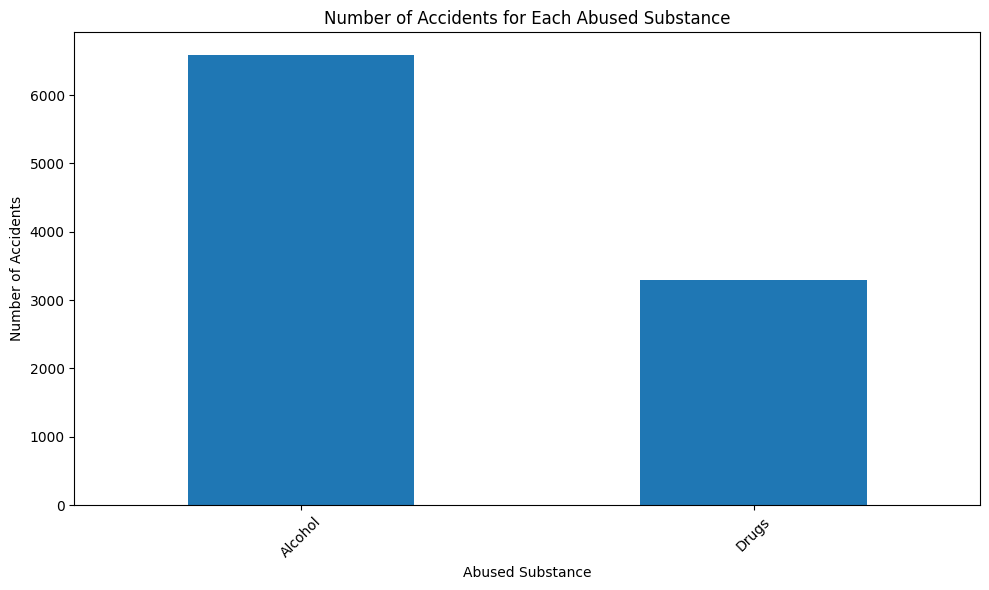

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'cleanmotorvehicleaccidents.csv'
data = pd.read_csv(filePath)

# Count occurrences of each 'Abused Substance'
substance_counts = data['Abused Substance'].value_counts()

plt.figure(figsize=(10, 6))
substance_counts.plot(kind='bar')
plt.title('Number of Accidents for Each Abused Substance')
plt.xlabel('Abused Substance')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### The graph above correlates the number of accidents that occurred when the driver was intoxicated via alcohol vs drugs. I used a bar chart to easily show the numbers.

C:\Users\flyin\AppData\Local\Temp\ipykernel_25480\1961892662.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filePath)


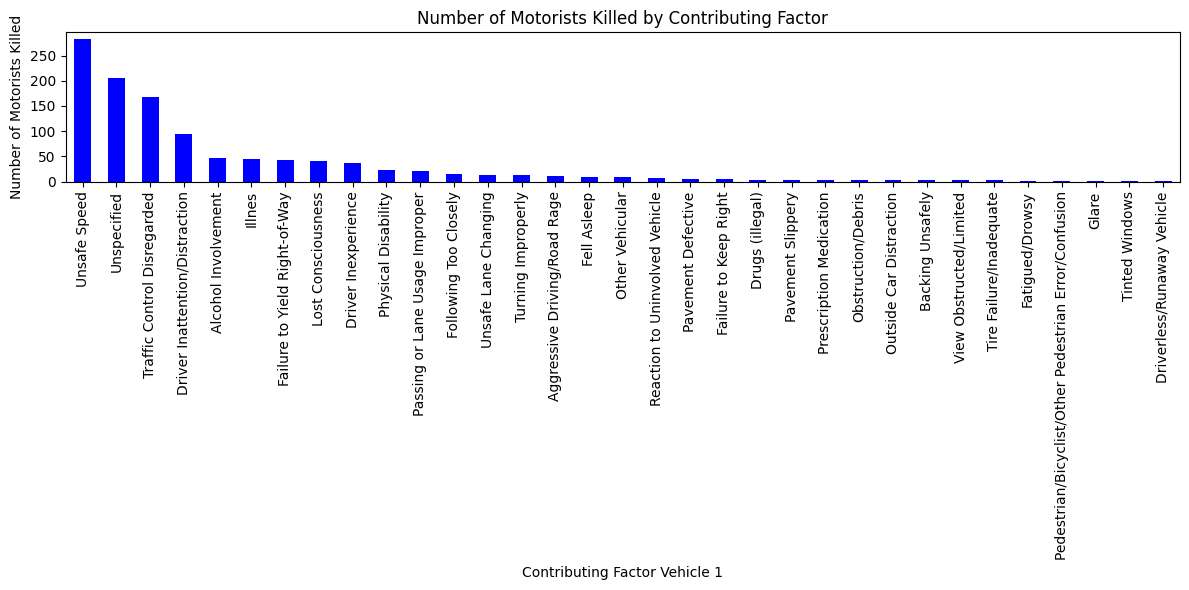

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'Motor_Vehicle_Collisions_-_Crashes.csv'
data = pd.read_csv(filePath)

# Group by 'CONTRIBUTING FACTOR VEHICLE 1' and count occurrences of fatalities
fatalities_per_factor = data['CONTRIBUTING FACTOR VEHICLE 1'].loc[data['NUMBER OF MOTORIST KILLED'] > 0].value_counts()

plt.figure(figsize=(12, 6))
fatalities_per_factor.plot(kind='bar', color='blue')
plt.title('Number of Motorists Killed by Contributing Factor')
plt.xlabel('Contributing Factor Vehicle 1')
plt.ylabel('Number of Motorists Killed')
plt.xticks(rotation=90)
plt.yticks(range(0, max(fatalities_per_factor)+1, 50))
plt.tight_layout()
plt.show()


#### This chart goes even further beyond and breaks down crashes into more specific categories. I chose a histogram because it suits the type of data I wish to display

C:\Users\flyin\AppData\Local\Temp\ipykernel_25480\4155135543.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filePath)


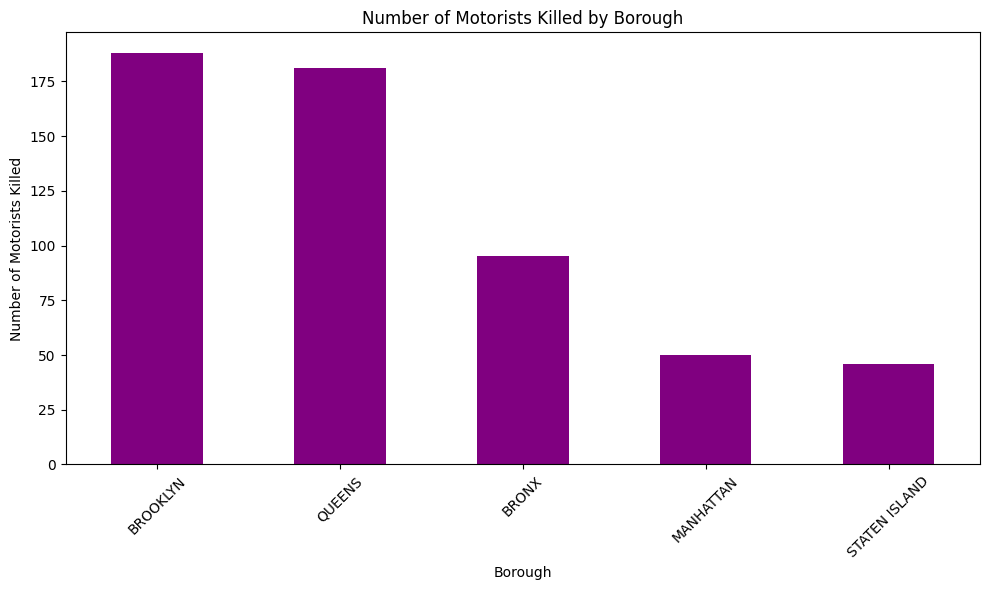

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'Motor_Vehicle_Collisions_-_Crashes.csv'
data = pd.read_csv(filePath)

killed_motorists_data = data[data['NUMBER OF MOTORIST KILLED'] > 0]

killed_per_borough = killed_motorists_data['BOROUGH'].value_counts()

plt.figure(figsize=(10, 6))
killed_per_borough.plot(kind='bar', color='purple')
plt.title('Number of Motorists Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Motorists Killed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Again, I used a Bar Graph to easily show the number of deaths per Borough. Surprisingly, the most deaths occurred in Brooklyn and Queens instead of Manhattan, which is what I originally guessed would be the highest.

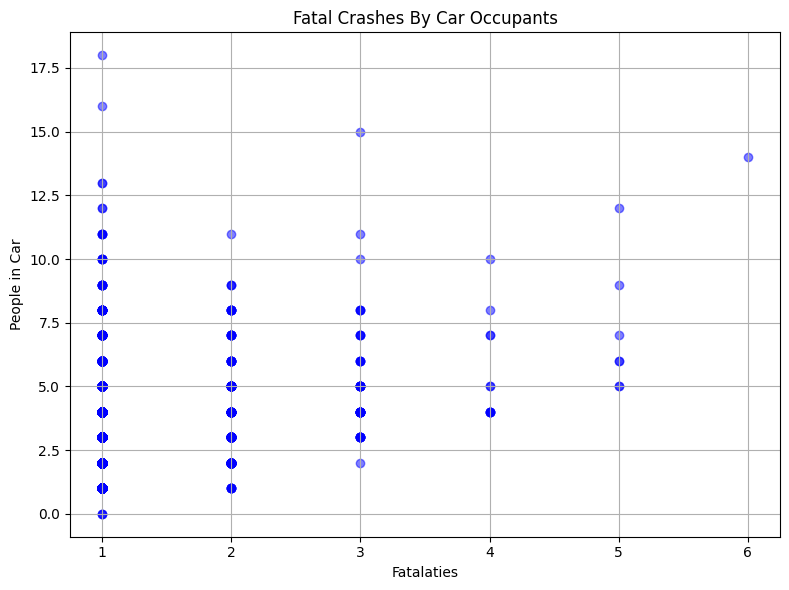

In [52]:
import requests
import matplotlib.pyplot as plt

url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList"

# Parameters for the API call
params = {
    'states': '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51',
    'fromYear': '2014',
    'toYear': '2015',
    'minNumOfVehicles': '1',
    'maxNumOfVehicles': '6',
    'format': 'json'
}

try:
    response = requests.get(url, params=params)

    if response.status_code == 200:
   
        data = response.json()

        # Get 'fatals' and 'persons' columns data
        fatals = []
        persons = []

        # Get 'fatals' and 'persons' from nested lists of dictionaries
        for sublist in data['Results']:
            for entry in sublist:
                if 'Fatals' in entry and 'Persons' in entry:
                    fatals.append(entry['Fatals'])
                    persons.append(entry['Persons'])

        # Time to plot
        plt.figure(figsize=(8, 6))
        plt.scatter(fatals, persons, color='blue', alpha=0.5)
        plt.title('Fatal Crashes By Car Occupants')
        plt.xlabel('Fatalaties')
        plt.ylabel('People in Car')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Request failed with status code: {response.status_code}")

except requests.RequestException as e:
    print(f"Request failed: {e}")


#### This chart shows that the more fatalaties occur when there are more people in the vehicle. I had a lot of issues with the API call (hence the try/except) but I was able to narrow down the call with the right parameters being passed.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
Stack Overflow, Python Documentation, the API information from the site at the top, Geeks for Geeks, various forums

In [53]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 9415 bytes to source.py
